# Grid search SARIMAX and ARIMA models

SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is a generalization of the ARIMA model that allows incorporating seasonality and exogenous variables. This model has a total of 6 hyperparameters that must be specified when training the model:

+ p: Trend autoregression order.

+ d: Trend difference order.

+ q: Trend moving average order.

+ P: Seasonal autoregressive order.

+ D: Seasonal difference order.

+ Q: Seasonal moving average order.

+ m: The number of time steps for a single seasonal period.

One way to find the best values is by using grid search. The `grid_search_sarimax` function of the *skforecast.model_selection_statsmodels* module is a wrapper that automates this process using the [SARIMAX](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX)   implementation available in the statsmodels library.

<script src="https://kit.fontawesome.com/d20edc211b.js" crossorigin="anonymous"></script>

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100;">

<p class="title">
    <i class="fa-triangle-exclamation fa" style="font-size: 18px; color:#ff9100;"></i>
    <b> &nbsp Warning</b>
</p>

The `model_selection_statsmodels` module is deprecated and will be removed in a future version of Skforecast. Instead, a forecaster based on ARIMA models, `ForecasterSarimax`, and the `model_selection_sarimax` module, for model evaluation and optimization, have been created.
<br><br>
Docs: https://joaquinamatrodrigo.github.io/skforecast/latest/user_guides/forecaster-sarimax-arima.html

</div>

## Libraries

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.model_selection_statsmodels import grid_search_sarimax

## Data

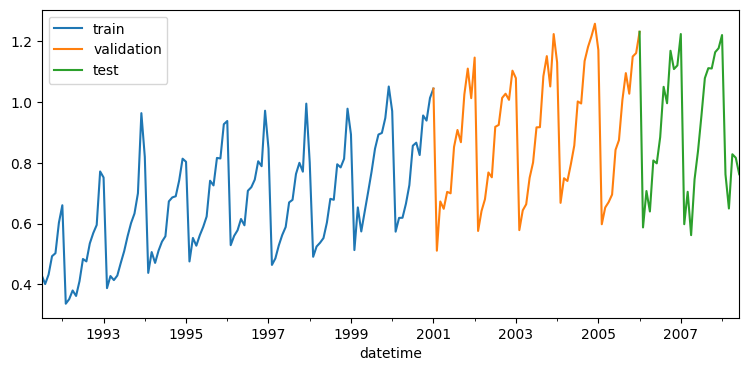

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 24
data_train = data.loc[: '2001-01-01']
data_val = data.loc['2001-01-01' : '2006-01-01']
data_test  = data.loc['2006-01-01':]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_val.plot(ax=ax, label='validation')
data_test.plot(ax=ax, label='test')
ax.legend();

## Grid Search

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
param_grid = {'order': [(12, 0, 0), (12, 2, 0), (12, 1, 0), (12, 1, 1), (14, 1, 4)],
             'seasonal_order': [(0, 0, 0, 0)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                   y = data.loc[:'2006-01-01'],
                   param_grid = param_grid,
                   initial_train_size = len(data_train),
                   fixed_train_size = False,
                   steps = 7,
                   metric = 'mean_absolute_error',
                   refit = False,
                   verbose = False,
                   fit_kwargs = {'maxiter': 200, 'disp': 0}
               )

results_grid

root       INFO  Number of models compared: 15
100%|█████████████████████████████████████████████████████| 15/15 [00:31<00:00,  2.07s/it]


,params,metric,order,seasonal_order,trend
12,"{'order': (14, 1, 4), 'seasonal_order': (0, 0,...",0.050256,"(14, 1, 4)","(0, 0, 0, 0)",None
13,"{'order': (14, 1, 4), 'seasonal_order': (0, 0,...",0.050256,"(14, 1, 4)","(0, 0, 0, 0)",n
9,"{'order': (12, 1, 1), 'seasonal_order': (0, 0,...",0.050467,"(12, 1, 1)","(0, 0, 0, 0)",None
10,"{'order': (12, 1, 1), 'seasonal_order': (0, 0,...",0.050467,"(12, 1, 1)","(0, 0, 0, 0)",n
14,"{'order': (14, 1, 4), 'seasonal_order': (0, 0,...",0.051899,"(14, 1, 4)","(0, 0, 0, 0)",c
11,"{'order': (12, 1, 1), 'seasonal_order': (0, 0,...",0.051981,"(12, 1, 1)","(0, 0, 0, 0)",c
6,"{'order': (12, 1, 0), 'seasonal_order': (0, 0,...",0.052858,"(12, 1, 0)","(0, 0, 0, 0)",None
7,"{'order': (12, 1, 0), 'seasonal_order': (0, 0,...",0.052858,"(12, 1, 0)","(0, 0, 0, 0)",n
8,"{'order': (12, 1, 0), 'seasonal_order': (0, 0,...",0.053497,"(12, 1, 0)","(0, 0, 0, 0)",c
3,"{'order': (12, 2, 0), 'seasonal_order': (0, 0,...",0.054425,"(12, 2, 0)","(0, 0, 0, 0)",None


In [5]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>